In [1]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [2]:
def get_perform(actual, predict):
    acc_score = accuracy_score(actual, predict)
    prec_score = precision_score(actual, predict,average='macro')
    rec_score = recall_score(actual, predict,average='macro')
    f1 = f1_score(actual, predict, average='macro')
    return pd.DataFrame({
        "accuracy_score":[acc_score],
        "precision_score":[prec_score],
        "recall_score": [rec_score],
        "f1_score":[f1]
    })

In [3]:
data = pd.read_csv(r"F:\GUVI\Project\capstone -4\Model data\model_sample_data.csv", index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4758418 entries, 0 to 4758417
Data columns (total 26 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  DeviceName          int64 
 16  NetworkMessageId    int64 
 17  RegistryKey         int64 
 18  RegistryValueName   int64 
 19  ApplicationId       int64 
 20  OAuthApplicationId  int64 
 21  ResourceIdName      int64 
 22  OSFamily            int64 
 23  CountryCode         int64 
 24  Date                object
 25  Time                obj

In [5]:
le = LabelEncoder()

for i in data.select_dtypes(include="object"):
    data[i] = le.fit_transform(data[i])

In [6]:
feature_cols  = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Category', 'EntityType','EvidenceRole','DeviceId', 'Sha256','IpAddress', 'Url','AccountSid', 'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'ApplicationId', 'OAuthApplicationId', 'ResourceIdName', 'OSFamily','CountryCode', 'Date', 'Time']

In [7]:
mm = MinMaxScaler()
data[feature_cols]  = mm.fit_transform(data[feature_cols])

In [8]:
val = data.drop("IncidentGrade", axis=1)
tar = data["IncidentGrade"]

In [9]:
train_data, test_data, train_lab, test_lab = train_test_split(val, tar, test_size=0.20, random_state=43)

In [15]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(train_data, train_lab)
lr_train_pred = lr.predict(train_data)
lr_test_pred = lr.predict(test_data)

c:\Users\syeda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
get_perform(train_lab, lr_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.607217,0.599166,0.537729,0.532808


In [17]:
get_perform(test_lab, lr_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.606564,0.598684,0.537415,0.532418


In [18]:
# DecisionTree Classifier

dtc = DecisionTreeClassifier(max_depth=50, random_state=105)
dtc.fit(train_data, train_lab)
dtc_train_pred = dtc.predict(train_data)
dtc_test_pred = dtc.predict(test_data)

In [19]:
get_perform(train_lab, dtc_train_pred) # overfitting

,accuracy_score,precision_score,recall_score,f1_score
0,0.999952,0.999946,0.999948,0.999947


In [20]:
get_perform(test_lab, dtc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.990492,0.989619,0.989615,0.989617


In [10]:
# RandomForest Classifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=154)
rfc.fit(train_data, train_lab)
rfc_train_pred = rfc.predict(train_data)
rfc_test_pred = rfc.predict(test_data)

In [11]:
get_perform(train_lab, rfc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.774257,0.863468,0.721023,0.750354


In [12]:
get_perform(test_lab, rfc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.773686,0.863119,0.720753,0.749946


In [13]:
# XGBClassifier

xgbc = xg.XGBClassifier()
xgbc.fit(train_data, train_lab)
xgbc_train_pred = xgbc.predict(train_data)
xgbc_test_pred = xgbc.predict(test_data)

In [14]:
get_perform(train_lab, xgbc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.918926,0.925202,0.906035,0.914307


In [15]:
get_perform(test_lab, xgbc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.918407,0.924752,0.905487,0.913788


In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

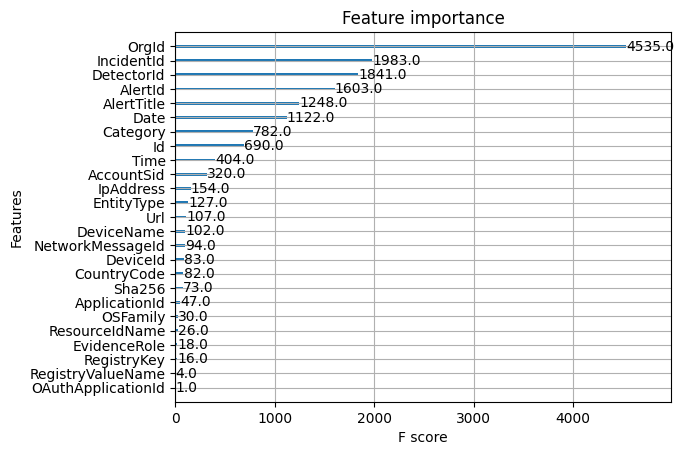

In [17]:
plot_importance(xgbc)
plt.show()

In [18]:
test = pd.read_csv(r"F:\GUVI\Project\capstone -4\Model data\model_test_data.csv", index_col=0)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147992 entries, 0 to 4147991
Data columns (total 26 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  DeviceName          int64 
 16  NetworkMessageId    int64 
 17  RegistryKey         int64 
 18  RegistryValueName   int64 
 19  ApplicationId       int64 
 20  OAuthApplicationId  int64 
 21  ResourceIdName      int64 
 22  OSFamily            int64 
 23  CountryCode         int64 
 24  Date                object
 25  Time                obj

In [21]:
sample_test_data = test.copy()

In [22]:
sample_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147992 entries, 0 to 4147991
Data columns (total 26 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  DeviceName          int64 
 16  NetworkMessageId    int64 
 17  RegistryKey         int64 
 18  RegistryValueName   int64 
 19  ApplicationId       int64 
 20  OAuthApplicationId  int64 
 21  ResourceIdName      int64 
 22  OSFamily            int64 
 23  CountryCode         int64 
 24  Date                object
 25  Time                obj

In [23]:
le = LabelEncoder()

for i in sample_test_data.select_dtypes(include="object"):
    sample_test_data[i] = le.fit_transform(sample_test_data[i])

In [24]:
sample_test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,...,529644,1631,635,2251,881,3586,5,242,138,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,...,529644,1631,635,2251,881,3586,0,242,137,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,...,529644,1631,635,2251,881,3586,5,242,142,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,529644,1631,635,2251,881,3586,5,242,146,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,...,529644,1631,635,2251,881,3586,5,242,140,63665


In [25]:
feature_cols  = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Category', 'EntityType','EvidenceRole','DeviceId', 'Sha256','IpAddress', 'Url','AccountSid', 'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'ApplicationId', 'OAuthApplicationId', 'ResourceIdName', 'OSFamily','CountryCode', 'Date', 'Time']

In [26]:
mm = MinMaxScaler()
sample_test_data[feature_cols]  = mm.fit_transform(sample_test_data[feature_cols])

In [27]:
encoded_test_data = sample_test_data.drop("IncidentGrade", axis=1)

In [34]:
encoded_test_data.shape

(4147992, 25)

In [47]:
encoded_test_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,...,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,0.728643,0.107038,0.019617,0.050654,0.055042,0.004975,0.611111,1.000000,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.913907,0.955889
1,0.819095,0.000489,0.152002,0.367289,0.000210,0.000018,0.055556,0.535714,0.0,0.012541,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.907285,0.540369
2,0.748744,0.023623,0.053767,0.076516,0.307983,0.095494,0.611111,0.821429,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.940397,0.139433
3,0.035176,0.036168,0.025498,0.533087,0.000000,0.000000,0.555556,0.250000,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.966887,0.504981
4,0.301508,0.059140,0.012693,0.003453,0.002836,0.000159,0.277778,1.000000,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.927152,0.737478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,0.316583,0.042685,0.005026,0.131956,0.014601,0.001060,0.555556,1.000000,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.913907,0.161917
4147988,0.256281,0.215543,0.051689,0.177070,0.023004,0.001732,0.555556,1.000000,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.913907,0.814093
4147989,0.758794,0.007657,0.006086,0.004207,0.005987,0.000256,0.055556,0.428571,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986755,0.034983
4147990,0.366834,0.011404,0.007070,0.011120,0.000105,0.000009,0.555556,0.642857,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.960265,0.679189


In [46]:
test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,529644,1631,635,2251,881,3586,5,242,2024-06-04,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,529644,1631,635,2251,881,3586,0,242,2024-06-03,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,529644,1631,635,2251,881,3586,5,242,2024-06-08,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,529644,1631,635,2251,881,3586,5,242,2024-06-12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,529644,1631,635,2251,881,3586,5,242,2024-06-06,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,139,120,InitialAccess,BenignPositive,User,Impacted,...,529644,1631,635,2251,881,3586,5,242,2024-06-04,03:53:15
4147988,438086666953,1323,31001,304819,219,196,InitialAccess,BenignPositive,User,Impacted,...,529644,1631,635,2251,881,3586,5,242,2024-06-04,19:32:19
4147989,1297080124487,47,3653,7243,57,29,CommandAndControl,FalsePositive,Ip,Related,...,529644,1631,635,2251,881,3586,5,242,2024-06-15,00:50:22
4147990,627065226886,70,4243,19142,1,1,InitialAccess,BenignPositive,Mailbox,Impacted,...,529644,1631,635,2251,881,3586,5,242,2024-06-11,16:18:12


In [43]:
encoded_test_data.loc[[3]]

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,...,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
3,0.035176,0.036168,0.025498,0.533087,0.0,0.0,0.555556,0.25,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.966887,0.504981


In [ ]:
# 0 = "BenignPositive" - example loc[4147990]
# 1 = "FalsePositive" - example loc[4147989]
# 2 = "TruePositive" - example loc[4147991]

In [57]:
xgbc.predict(encoded_test_data.loc[[4147991]])

array([2], dtype=int64)

In [58]:
import pickle

In [59]:
with open("XGBClassifier.pkl",'wb') as file:
    pickle.dump(xgbc, file)